In [1]:
plt.close('all')
%reset

NameError: name 'plt' is not defined

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import gridspec as gs
import scipy as sp
from scipy import special
from matplotlib.colors import LogNorm


In [3]:
anscombe_data = np.load('anscombe.npy')


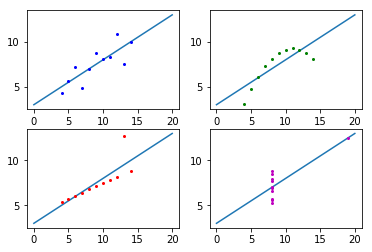

In [15]:
#plotting
x = np.linspace(0, 20, 1000)
y = 0.5*x + 3
plt.subplot(221)
plt.plot(x, y)
plt.plot(anscombe_data[: , 0], anscombe_data[: , 1], "bo", markersize = 2)

plt.subplot(222)
plt.plot(x, y)
plt.plot(anscombe_data[: , 2], anscombe_data[: , 3], "go", markersize = 2)

plt.subplot(223)
plt.plot(x, y)
plt.plot(anscombe_data[: , 4], anscombe_data[: , 5], "ro", markersize = 2)

plt.subplot(224)
plt.plot(x, y)
plt.plot(anscombe_data[: , 6], anscombe_data[: , 7], "mo", markersize = 2)

plt.show()

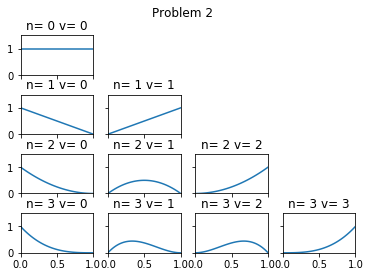

In [4]:
# problem 2
# we firstly define the Bernstein basis polynominals
def BSpoly(n, v, x):
    poly = sp.special.binom(n, v)*(x**v)*((1 - x)**(n - v))
    return poly
x_val = np.linspace(0, 1, 100)
y_val = np.zeros_like(x_val)

# design the layout of the plot
grid = gs.GridSpec(4, 4)
grid.update(hspace = 0.5)
fig = plt.figure()
for n in range(4):
    for v in range(n+1):
        # define the location of the subplot
        ax = fig.add_subplot(grid[n , v] )
        for i, x in enumerate(x_val):
            y_val[i] = BSpoly(n, v, x)
        ax.plot(x_val, y_val)
        ax.set_title("n= "+str(n)+" v= "+str(v))
        ax.set_xlim([0, 1])
        ax.set_ylim([0,1.5])
        if v != 0:
            ax.tick_params( labelleft = "off")
        if n != 3:
            ax.tick_params(labelbottom = "off")

fig.suptitle("Problem 2")
fig

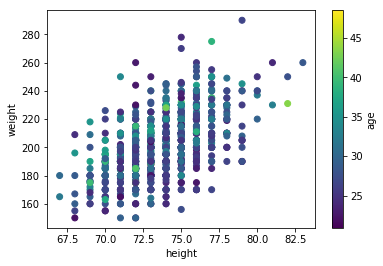

In [95]:
mlb_data = np.load("MLB.npy")
height = mlb_data[:, 0]
weight = mlb_data[:, 1]
age    = mlb_data[:, 2]

mlbfig = plt.figure()
plt.scatter(height, weight, c = age)
plt.xlabel("height")
plt.ylabel("weight")
cbar = plt.colorbar()
cbar.set_label("age")

mlbfig

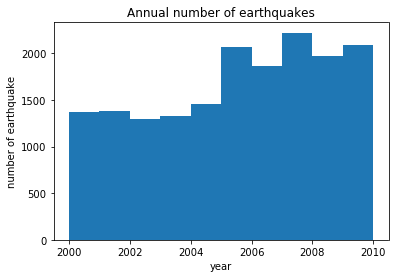

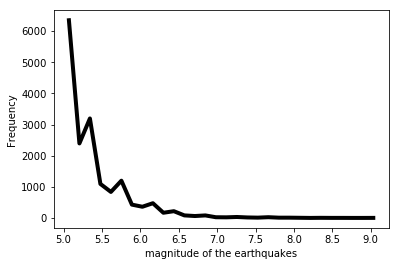

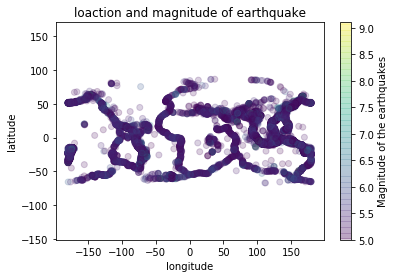

In [6]:
# problem 4
year, magnitude, longitude, latitude = np.load("earthquakes.npy").T

plt.hist(year, bins = range(2000, 2011))
plt.xlabel("year")
plt.ylabel("number of earthquake")
plt.title("Annual number of earthquakes")
plt.show()

freq, bin_edges = np.histogram(magnitude, bins=30)
bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
plt.plot(bin_centers, freq, 'k-', lw=4)
plt.xlabel("magnitude of the earthquakes")
plt.ylabel("Frequency")
plt.show()

plt.scatter(longitude, latitude, c = magnitude, alpha =0.2)
cbar = plt.colorbar()
cbar.set_label("Magnitude of the earthquakes")
plt.axis("equal")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.title("loaction of ")
plt.title("loaction and magnitude of earthquake")
plt.show()


In [33]:
plt.colorbar?


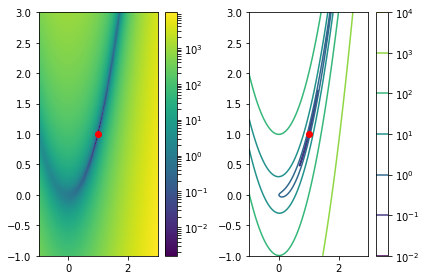

In [7]:
# problem 5
x = np.linspace(-1, 3, 500)
X, Y = np.meshgrid(x, x.copy())
Z = (1 - X)**2 + 100*(Y - X**2)**2
prob5fig = plt.figure()
plt.subplot(121)
plt.pcolormesh(X, Y, Z, cmap = "viridis", norm = LogNorm())
plt.colorbar()
plt.plot(1, 1, "ro")

plt.subplot(122)
plt.contour(X, Y, Z, 48, cmap = "viridis", norm = LogNorm())
plt.colorbar()
plt.plot(1, 1, "ro")

plt.tight_layout()
plt.show()

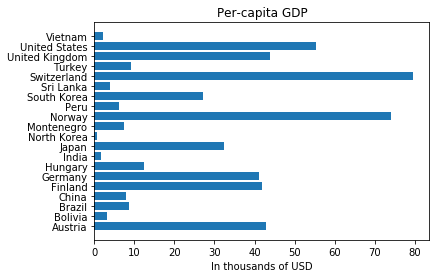

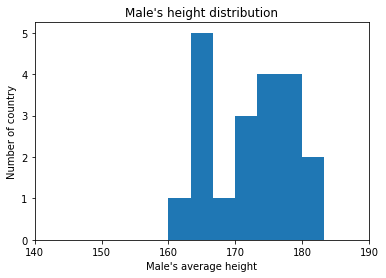

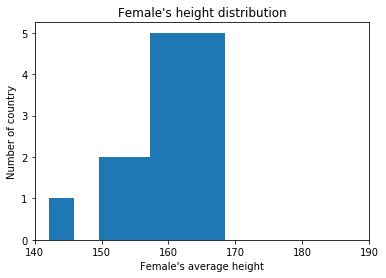

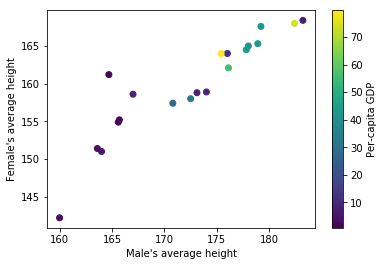

In [33]:
country_data = np.load("countries.npy")
country_names = ["Austria", "Bolivia", "Brazil", "China",
"Finland", "Germany", "Hungary", "India",
"Japan", "North Korea", "Montenegro", "Norway",
"Peru", "South Korea", "Sri Lanka", "Switzerland",
"Turkey", "United Kingdom", "United States", "Vietnam"]
population = country_data[:, 0]
GDP = country_data[:, 1]
m_height = country_data[:, 2]
f_height = country_data[:, 3]

# per-capita GDP
percapita_GDP = GPD/population
positions = np.arange(len(country_names))
prob6fig1 = plt.figure()
plt.barh(positions, percapita_GDP, align = "center")
plt.yticks(positions, country_names)
plt.title("Per-capita GDP")
plt.xlabel("In thousands of USD")
plt.show()

#Male's distirbution
prob6fig2 = plt.figure()
plt.hist(m_height, bins = 7)
plt.xlabel("Male's average height")
plt.ylabel("Number of country")
plt.title("Male's height distribution")
plt.xlim(140, 190)
plt.show()

#Female's height distirbution
prob6fig2 = plt.figure()
plt.hist(f_height, bins = 7)
plt.xlabel("Female's average height")
plt.ylabel("Number of country")
plt.title("Female's height distribution")
plt.xlim(140, 190)
plt.show()

#scatterplot between male's and female's height
prob6fig3 = plt.figure()
plt.scatter(m_height, f_height, c = percapita_GDP)
cbar = plt.colorbar()
cbar.set_label("Per-capita GDP")
plt.xlabel("Male's average height")
plt.ylabel("Female's average height")
plt.show()


